# Final Assessment for Data Science for Spatial Systems
<font size=4>
    </font>

---
## Research question
<font size=4>
    </font>

    
### What factors affect the house prices in Beijing?
<font size=4>
    </font>

---
## Introduction

<font size=4>
    </font>

<font size=4>As the population of all countries continues to grow, the housing issues are gradually arousing the public’s attention. In some large cities such as London, Beijing, Hong Kong, Tokyo, the rates of increase in house prices rise constantly every year. This puts a lot of pressure on those who want to own a property in these big cities, especially for young people between 25 and 35 years old. According to the data from the National Bureau of Statistics of China, the mean price of new properties increased by about 10.78% year over year in June 2017 in 70 cities of China (MARIA DE GUZMAN, 2019). The rise of national housing price was quicker than 6 months ago that it increased by about 9.7% year over year at the end of 2018.</font>

<font size=4>Since the house price is so high in such large cities, we want to explore the variation of house prices in recent years and the factors that have an impact on it. It may help the government and the relevant officials to solve the problem of high house prices and control the house price to some degree. This report aims to select a city which has a high price of properties and analyze the factors that have a great influence on it. Thus, we may find the reason for the high house price. We select Beijing as the city we are going to study.</font> 
<font size=4>
    </font>

---
## Literature review

<font size=4>
    </font>

<font size=4>Multiple linear regression is a common method to apply in the analysis of house prices. The research (Aminah Md Yusof and Syuhaida Ismail, 2012) use multiple linear regression to explain the variation of house price in Malaysia. Also, in research (Madhuri, Anuradha and Pujitha, 2019), they apply different regression models to build the house prices prediction. The results demonstrate that there will be some slight differences in the effects of various regression models. Thus, we can use different regression models to make the analysis.</font>

<font size=4>As for the factors that we can select in the model, the research (Research Online, Amri and Tularam, 2012) utilizes the linear and nonlinear models in analyzing the housing prices of a city in Australia. They find that the location variables can have some impact on the housing price. Also, the linear and nonlinear models almost have the same effect on the housing price analysis in most instances. In research (Zhou, 2021), they use the polynomial regression and particle swarm optimization method to build house prices prediction. The factors they explore include the number of different types of rooms and the height of the property (it is on which floor). Another factor about the public transportation facilities around the house is pointed out in research (Rahadi et al., 2015). It claims that the price of the house will increase due to the construction of the surrounding public transportation facilities. Thus, we can add these types of factors to our regression model. </font>
<font size=4>
    </font>

---
## Data preprocessing

<font size=4>
    </font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdate
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.tools.tools import add_constant

In [2]:
# data = pd.read_csv('house prices in Beijing.csv',encoding='gbk',low_memory=False)

data_url = 'https://github.com/VON-N1NE/DSSS/raw/main/Data/house%20prices%20in%20Beijing.csv'
data = pd.read_csv(data_url,encoding='gbk',low_memory=False)

In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [4]:
data.columns

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')

<font size=4>The data includes the key factors that wan can utilize in our regression model which are the location and price of property, square, the number of living rooms, drawing rooms, kitchens, and bathrooms. Also, it contains information on whether the property has a subway near it, which is related to the factors about public transportation.</font>

In [5]:
print("data: ", data.shape)

data:  (318851, 26)


<font size=4>It contains a total of 318851 second-hand house trading data.  </font>

In [6]:
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318851.000000,318851.000000,3.188510e+05,160874.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,316830.000000,318851.000000,318851.000000,3.188510e+05,318819.000000,318819.000000,318819.000000,318851.000000,318388.000000
mean,116.418459,39.949591,1.129113e+12,28.822339,16.731508,349.030201,43530.436379,83.240597,0.994599,3.009790,2.606330,4.451026,6.316486e+01,0.577055,0.645601,0.601112,6.763564,63682.446305
std,0.112054,0.091983,2.363447e+12,50.237343,34.209185,230.780778,21709.024204,37.234661,0.109609,1.269857,1.311739,1.901753,2.506851e+04,0.494028,0.478331,0.489670,2.812616,22329.215447
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.344985,39.893200,1.111027e+12,1.000000,0.000000,205.000000,28050.000000,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46339.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38737.000000,74.260000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477581,40.003018,1.111027e+12,37.000000,18.000000,425.500000,53819.500000,98.710000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75950.000000
max,116.732378,40.252758,1.114620e+15,1677.000000,1143.000000,18130.000000,156250.000000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000


<font size=4>Firstly, we check if the data contains null values. </font>

In [7]:
data.isnull().sum(axis=0)

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

<font size=4>We find that some categories of data are missing and need to be dealt with.</font>

In [8]:
data['DOM'].fillna(data['DOM'].median(),inplace=True)
data=data.dropna(axis=0, how='any')

In [9]:
data.isnull().sum(axis=0)

url                    0
id                     0
Lng                    0
Lat                    0
Cid                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
floor                  0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

<font size=4>The data does not contain null values anymore.</font>
<font size=4>
    </font>

<font size=4>We check if every variable has the correct type of data.</font>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316448 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  316448 non-null  object 
 1   id                   316448 non-null  object 
 2   Lng                  316448 non-null  float64
 3   Lat                  316448 non-null  float64
 4   Cid                  316448 non-null  int64  
 5   tradeTime            316448 non-null  object 
 6   DOM                  316448 non-null  float64
 7   followers            316448 non-null  int64  
 8   totalPrice           316448 non-null  float64
 9   price                316448 non-null  int64  
 10  square               316448 non-null  float64
 11  livingRoom           316448 non-null  object 
 12  drawingRoom          316448 non-null  object 
 13  kitchen              316448 non-null  int64  
 14  bathRoom             316448 non-null  object 
 15  floor            

<font size=4>We modify the wrong data type which are “tradeTime”, “livingRoom”, ”drawingRoom”, ”bathRoom”. “floor”, “constructionTime”.</font>

In [11]:
data['tradeTime'] = pd.to_datetime(data['tradeTime'])

<font size=4>We convert the data type of “tradeTime” to datetime type.</font>

In [12]:
data['constructionTime'].value_counts()
data=data[~data['constructionTime'].isin(['未知'])]
data['constructionTime']=data['constructionTime'].astype('int64')

<font size=4>There exists Chinese string in “constructionTime”. So we delete them and convert the data type of “constructionTime” to int type.</font>

In [13]:
data['floor']=data['floor'].map(lambda x:x.split(' ')[1]).astype('int64')
data['livingRoom']=data['livingRoom'].astype('int64')
data['drawingRoom']=data['drawingRoom'].astype('int64')
data['bathRoom']=data['bathRoom'].astype('int64')
data['buildingType']=data['buildingType'].astype('int64')

<font size=4>We convert the data type of “floor” , “livingRoom”, “drawingRoom”, “bathRoom”, “buildingType” to int type.</font>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297701 entries, 0 to 318849
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   url                  297701 non-null  object        
 1   id                   297701 non-null  object        
 2   Lng                  297701 non-null  float64       
 3   Lat                  297701 non-null  float64       
 4   Cid                  297701 non-null  int64         
 5   tradeTime            297701 non-null  datetime64[ns]
 6   DOM                  297701 non-null  float64       
 7   followers            297701 non-null  int64         
 8   totalPrice           297701 non-null  float64       
 9   price                297701 non-null  int64         
 10  square               297701 non-null  float64       
 11  livingRoom           297701 non-null  int64         
 12  drawingRoom          297701 non-null  int64         
 13  kitchen       

<font size=4>All the data are in correct type.</font>

In [15]:
print(data.shape)

(297701, 26)


<font size=4>After data preprocessing, it contains a total of 297701 data.</font>
<font size=4>
    </font>

---
## Presentation of data

<font size=4>
    </font>

array([[<AxesSubplot:title={'center':'Lng'}>,
        <AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Cid'}>,
        <AxesSubplot:title={'center':'DOM'}>,
        <AxesSubplot:title={'center':'followers'}>],
       [<AxesSubplot:title={'center':'totalPrice'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'square'}>,
        <AxesSubplot:title={'center':'livingRoom'}>,
        <AxesSubplot:title={'center':'drawingRoom'}>],
       [<AxesSubplot:title={'center':'kitchen'}>,
        <AxesSubplot:title={'center':'bathRoom'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'buildingType'}>,
        <AxesSubplot:title={'center':'constructionTime'}>],
       [<AxesSubplot:title={'center':'renovationCondition'}>,
        <AxesSubplot:title={'center':'buildingStructure'}>,
        <AxesSubplot:title={'center':'ladderRatio'}>,
        <AxesSubplot:title={'center':'elevator'}>,
        <AxesS

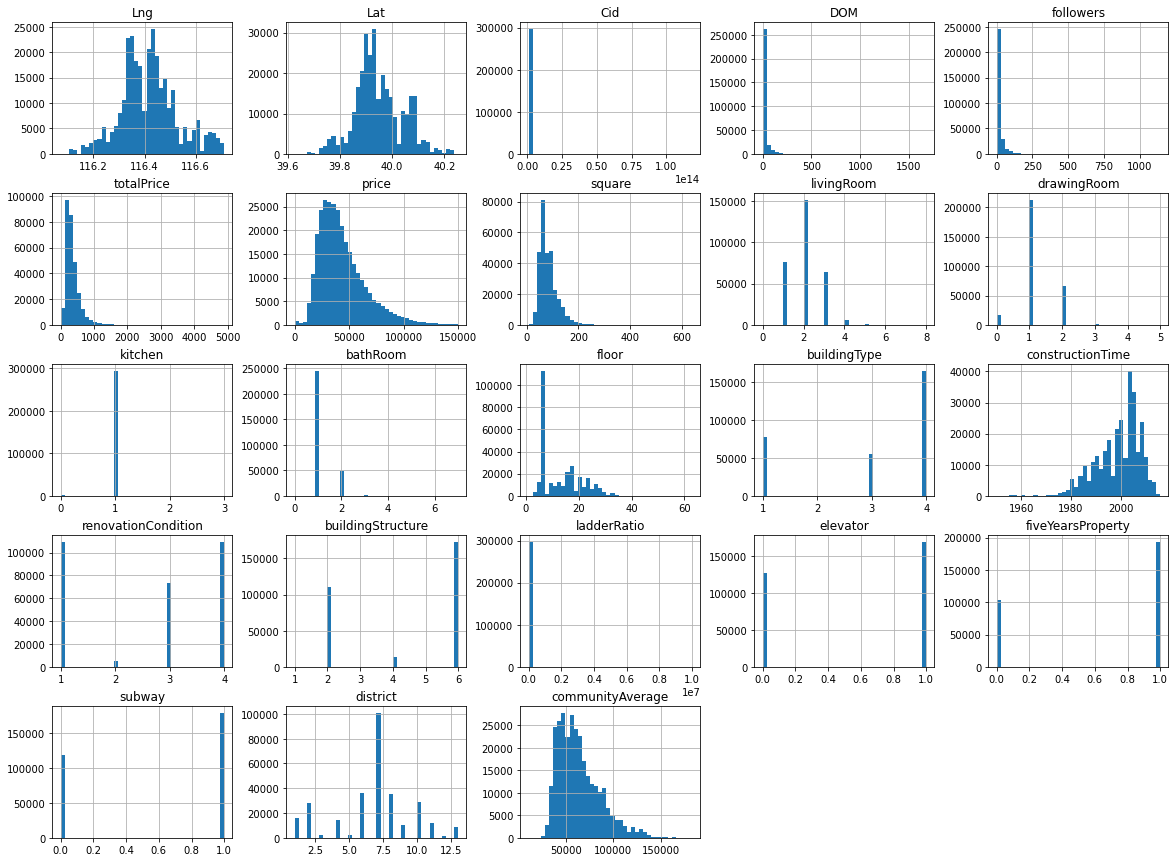

In [16]:
data.hist(bins=40,figsize=(20,15))

<font size=4>We use histogram plots to observe the total data.</font>

<AxesSubplot:xlabel='Trade year', ylabel='The mean price of housing'>

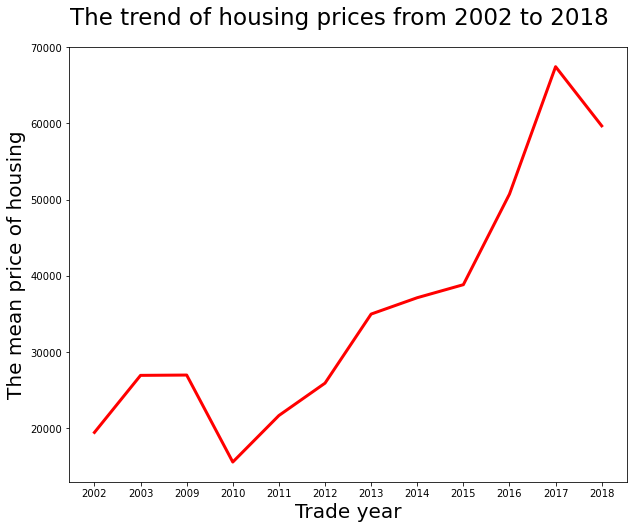

In [17]:
data['tradeyear']=data.tradeTime.astype(str).str[0:4]
data_year=data.groupby('tradeyear').price.mean()
plt.figure(figsize=(10,8))
plt.xlabel('Trade year', fontsize=20)
plt.ylabel('The mean price of housing', fontsize=20)
plt.suptitle('The trend of housing prices from 2002 to 2018', fontsize=23,y=0.95)
sns.lineplot(data=data_year,color="red",linewidth=3)


<font size=4>We take a look at the trend of second-hand housing prices from 2002 to 2018 before building the linear regression model. From the figure, we can observe that the variation of housing prices is quite large from 2013 to 2018. In 2013, the mean prices of second-hand houses are about 35,000 RMB per square meter. However, they rose to approximately 68,000 RMB per square meter in 2017, which is about twice the number in 2013. In 2018, the mean prices of second-hand houses dropped slightly. Since the variation of house prices is quite large, if we use the total data to build the linear regression model, the accuracy maybe not perform well.  </font>

In [18]:
data.tradeyear.value_counts()

2016    85350
2015    64337
2017    42009
2013    35539
2012    34415
2014    30068
2011     5582
2018      219
2010      177
2002        3
2003        1
2009        1
Name: tradeyear, dtype: int64

<font size=4>From above, we can see that the top three with the most amount data are from 2015 to 2017. As a result, we decide to use the data from 2015 to 2017 respectively to build the linear regression model combining previous price trend analysis.</font>

---
## The relationship between the house prices and the predictor factors

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

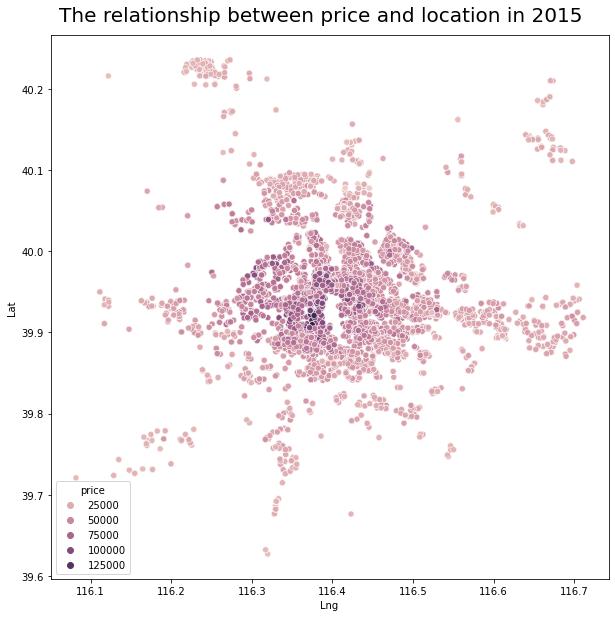

In [19]:
data_2015=data.loc[data.tradeyear=='2015',:]
plt.figure(figsize=(10,10))
plt.suptitle('The relationship between price and location in 2015', fontsize=20,y=0.92)
sns.scatterplot(x=data_2015['Lng'],y=data_2015['Lat'],hue=data_2015['price'])

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

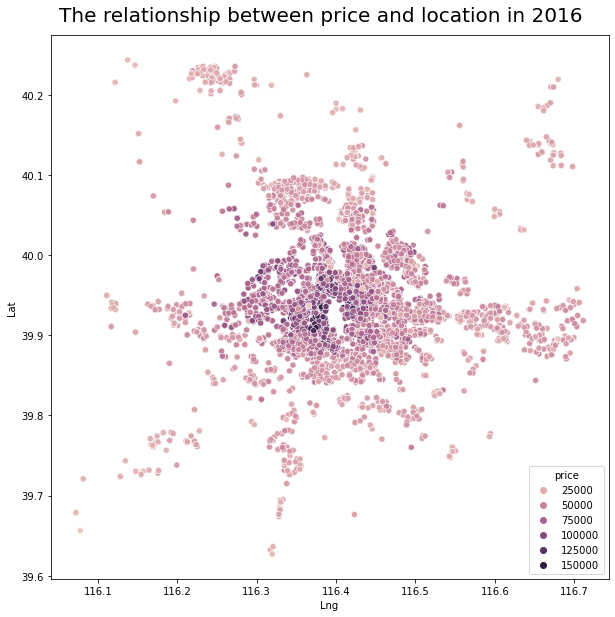

In [20]:
data_2016=data.loc[data.tradeyear=='2016',:]
plt.figure(figsize=(10,10))
plt.suptitle('The relationship between price and location in 2016', fontsize=20,y=0.92)
sns.scatterplot(x=data_2016['Lng'],y=data_2016['Lat'],hue=data_2016['price'])

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

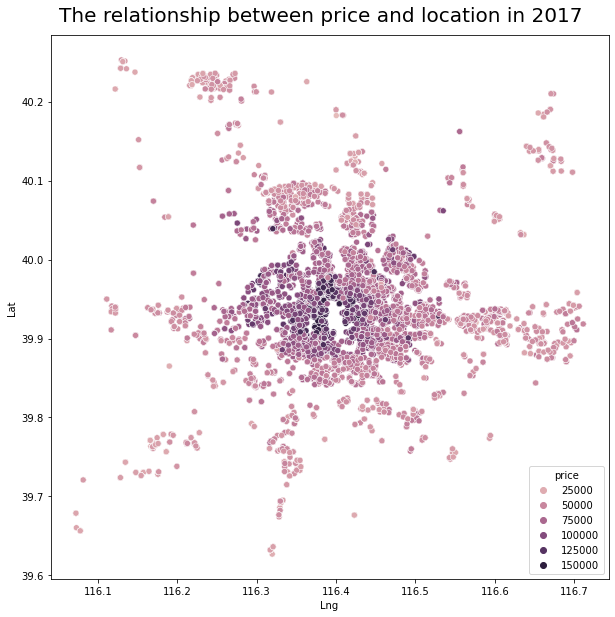

In [21]:
data_2017=data.loc[data.tradeyear=='2017',:]
plt.figure(figsize=(10,10))
plt.suptitle('The relationship between price and location in 2017', fontsize=20,y=0.92)
sns.scatterplot(x=data_2017['Lng'],y=data_2017['Lat'],hue=data_2017['price'])

<font size=4>We use the scatter plots to demonstrate the relationship between house prices and the longitude and latitude which represents the location factor. From the figures, we can observe that the closer to the center of Beijing, the higher the house prices are. This implies that there exists a certain relationship between house prices and the location. We can take the location variable as the factor to build the linear regression model. </font>

Text(0.5, 0.92, 'The relationship between house price and its number of livingrooms')

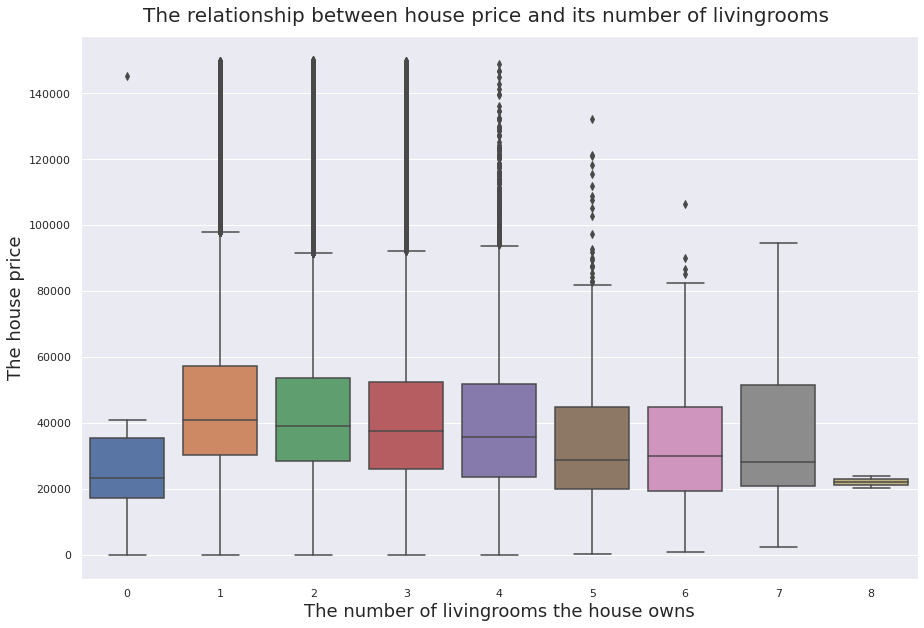

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(data=data, x="livingRoom", y="price")
ax.set_xlabel('The number of livingrooms the house owns', fontsize=18)
ax.set_ylabel('The house price', fontsize=18)
plt.suptitle('The relationship between house price and its number of livingrooms', fontsize=20,y=0.92)

Text(0.5, 0.92, 'The relationship between house price and its number of kitchens')

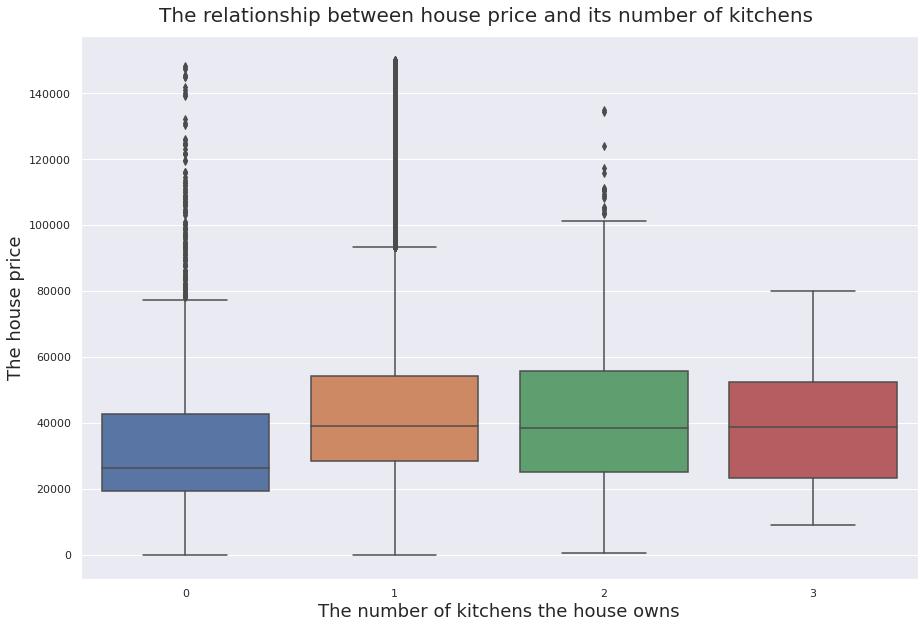

In [23]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(data=data, x="kitchen", y="price")
ax.set_xlabel('The number of kitchens the house owns', fontsize=18)
ax.set_ylabel('The house price', fontsize=18)
plt.suptitle('The relationship between house price and its number of kitchens', fontsize=20,y=0.92)

Text(0.5, 0.92, 'The relationship between house price and its number of drawingrooms')

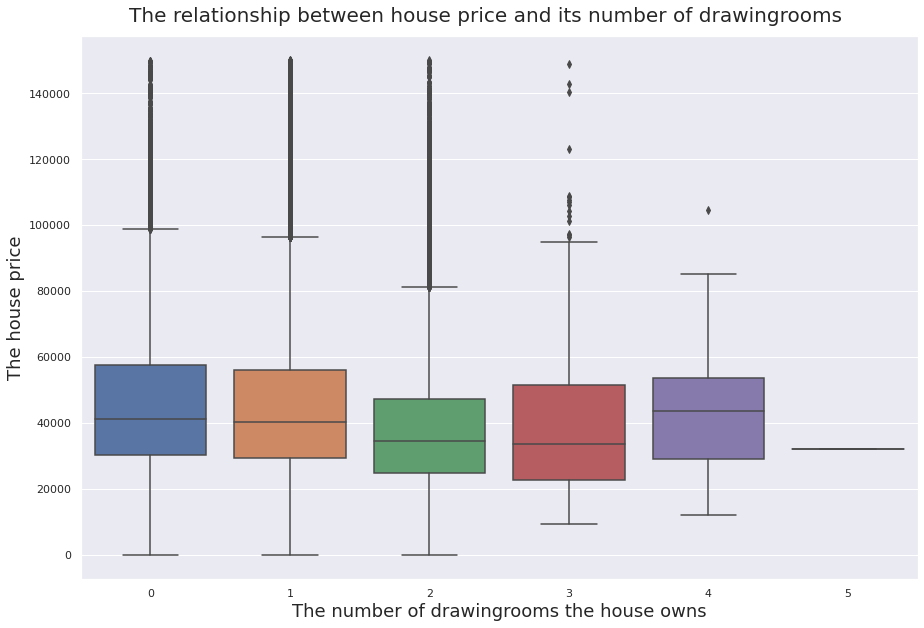

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(data=data, x="drawingRoom", y="price")
ax.set_xlabel('The number of drawingrooms the house owns', fontsize=18)
ax.set_ylabel('The house price', fontsize=18)
plt.suptitle('The relationship between house price and its number of drawingrooms', fontsize=20,y=0.92)

Text(0.5, 0.92, 'The relationship between house price and its number of bathrooms')

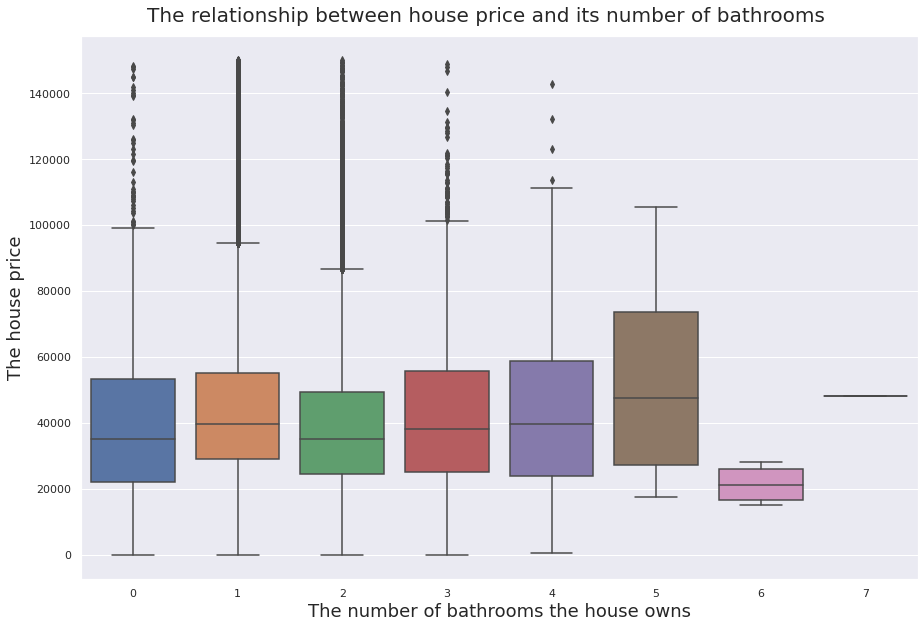

In [25]:
sns.set(rc={'figure.figsize':(15,10)})
ax = sns.boxplot(data=data, x="bathRoom", y="price")
ax.set_xlabel('The number of bathrooms the house owns', fontsize=18)
ax.set_ylabel('The house price', fontsize=18)
plt.suptitle('The relationship between house price and its number of bathrooms', fontsize=20,y=0.92)

<font size=4>We use the box plots to demonstrate the distribution of house prices and the number of different types of rooms they own. From the figures, we can observe that although the price distribution is relatively even and almost all on a horizontal line, there are many outliers for each number of different types of rooms. This suggests that the number of different types of rooms is not a critical factor affecting house prices. </font>

Text(0.5, 0.95, 'The relationship between house price and buildingType')

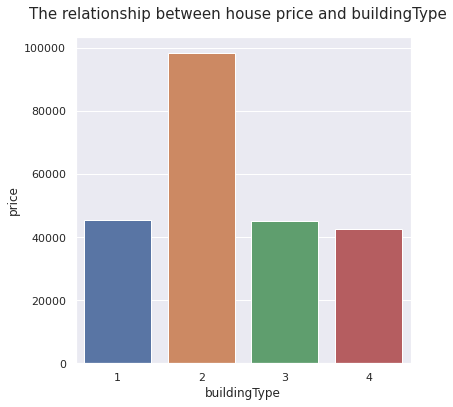

In [26]:
buildingType_data=data.groupby('buildingType').price.mean()
sns.set(rc={'figure.figsize':(6,6)})
sns.barplot(x=buildingType_data.index,y=buildingType_data)
plt.suptitle('The relationship between house price and buildingType', fontsize=15,y=0.95)

<font size=4>From the bar chart, we can observe that when the building type equals number 2, the house prices are higher than the other three numbers, which means the building type can have some impact on the house prices. </font>

Text(0.5, 0.95, 'The relationship between house price and subway')

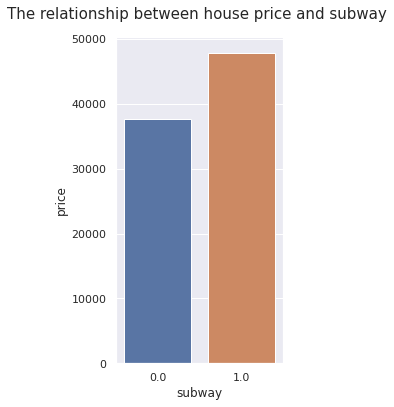

In [27]:
subway_data=data.groupby('subway').price.mean()
sns.set(rc={'figure.figsize':(3,6)})
sns.barplot(x=subway_data.index,y=subway_data)
plt.suptitle('The relationship between house price and subway', fontsize=15,y=0.95)

<font size=4>From the bar chart, we can observe that whether there are subways near the house has little effect on house prices. </font>

Text(0.5, 0.92, 'The relationship between house price and district')

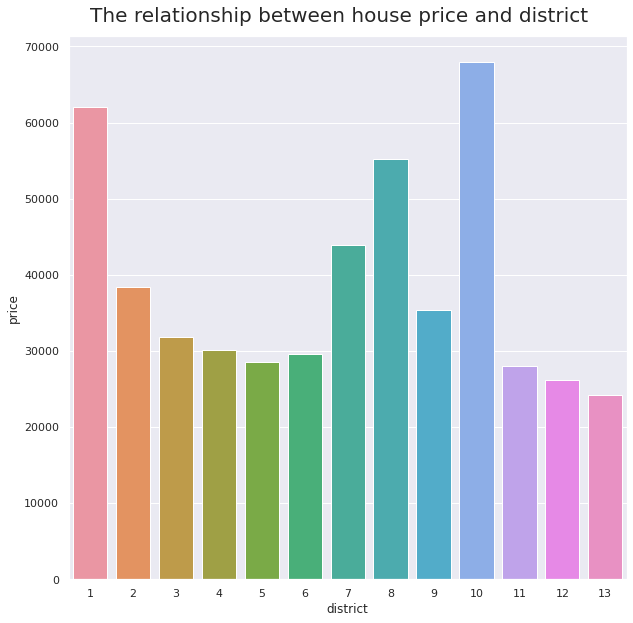

In [28]:
district_data=data.groupby('district').price.mean()
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=district_data.index,y=district_data)
plt.suptitle('The relationship between house price and district', fontsize=20,y=0.92)

<font size=4>From the bar chart, we can observe that different districts have various houses price. This shows we can take the “district” as a predictor factor.</font>

Text(0.5, 0.92, 'The relationship between house price and building structure')

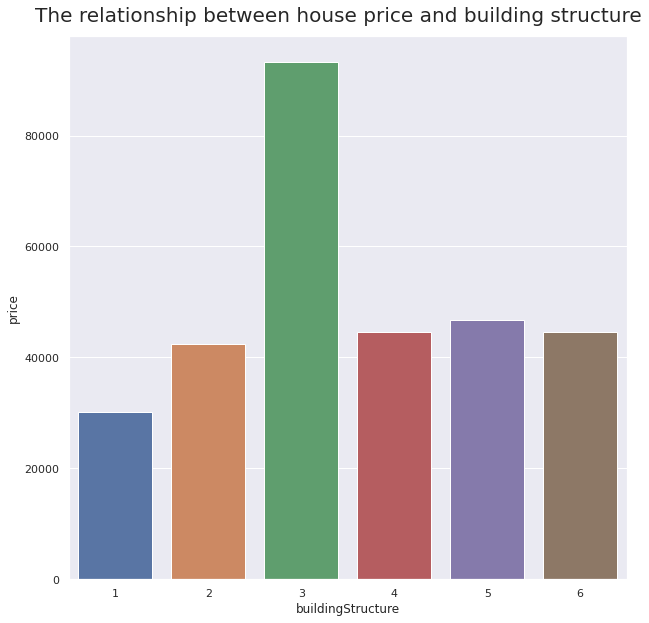

In [29]:
buildingStructure_data = data.groupby('buildingStructure').price.mean()
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(x=buildingStructure_data.index,y=buildingStructure_data)
plt.suptitle('The relationship between house price and building structure', fontsize=20,y=0.92)

<font size=4>Similarly, we can observe that different building structures have various house prices. This shows we can take the “building structure” as a predictor factor.</font>

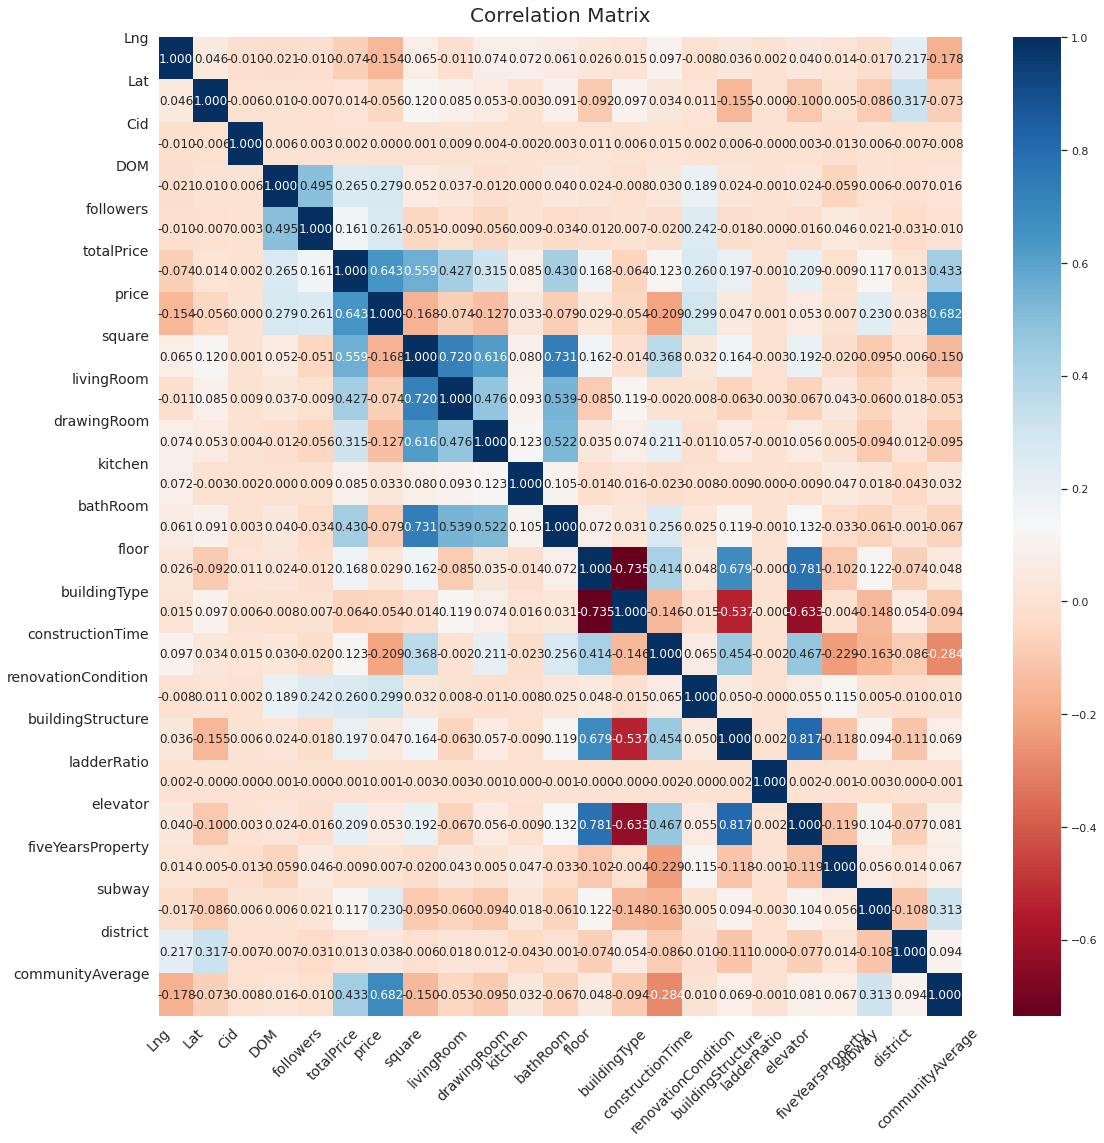

In [30]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(18, 18))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".3f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, fontsize=14, rotation=45);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=14)
#show plot

plt.title('Correlation Matrix', fontsize=20,y=1.01)
plt.show()

<font size=4> From the correlation matrix, we can found that the "communityAverage" has a high correlation coefficient with house prices. So, we can add it to the predictor variables. It represents the average house price of the house's community.</font>

<font size=4>
    </font>

---
## Methodology

<font size=4>
    </font>

<font size=4>We use multiple linear regression to build the model. The response variable is the house price. We select the location variable (longitude and latitude), the square, the number of different types of rooms (living room, drawing room, kitchen, bathroom), building type, subway, district, renovation condition, building structure, elevator, community average as the predictor factors. Before we build the model we should check the multicollinearity between these predictors. Thus, we utilize Variance Inflation Factor (VIF) to remove the multicollinearity among the predictor factors. Then, we can build the multiple linear regression model of house prices in 2015, 2016, and 2017 respectively. Also, we can use the whole house prices data which is from 2015 to 2017 to build the model to find the differences between them. The research (Madhuri, Anuradha and Pujitha, 2019) applies the LASSO regression to create the prediction model of house prices. So, we can use LASSO to improve the accuracy of the model.</font>
<font size=4>
    </font>

---
## Results

<font size=4>
    </font>

### Variance Inflation Factor (VIF)

<font size=4>
    </font>

<font size=4>If two factors have multicollinearity relationships, it will affect the entire regression results. So, we need to use the Variance Inflation Factor (VIF) method to remove the potential multicollinearity among the predictor factors.</font>

In [31]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
df = data_2015
def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [32]:
def calculate_vif_(df, thresh=5):
    const = add_constant(df)
    cols = const.columns
    variables = np.arange(const.shape[1])
    vif_df = pd.Series([variance_inflation_factor(const.values, i)
        for i in range(const.shape[1])],
        index=const.columns).to_frame()
    vif_df = vif_df.sort_values(by=0, ascending=False).rename(columns={0: 'VIF'})
    vif_df = vif_df.drop('const')
    vif_df = vif_df[vif_df['VIF'] > thresh]
    print('Features above VIF threshold:\n')
    print(vif_df[vif_df['VIF'] > thresh])
    col_to_drop = list(vif_df.index)
    for i in col_to_drop:
        print('Dropping: {}'.format(i))
        df = df.drop(columns=i)
    return df


<font size=4>We define the VIF function.</font>

In [33]:
feature_cols = ['Lng', 'Lat',  'square', 'livingRoom','drawingRoom','kitchen','bathRoom',
                'buildingType','buildingStructure','communityAverage','subway','district']

<font size=4>We select the above variables as the predictor factors.</font>

In [34]:
predictors_data_2015 = data_2015[feature_cols]
response_data_2015 = data_2015[['price']]

predictors_data_2016 = data_2016[feature_cols]
response_data_2016 = data_2016[['price']]

predictors_data_2017 = data_2017[feature_cols]
response_data_2017 = data_2017[['price']]

<font size=4>We extract the predictor variables and response variables from the processed data.</font>

In [35]:
df_predictors_select_VIF_2015 = calculate_vif_(predictors_data_2015)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF_2015.columns)

Features above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []
The columns remaining after VIF selection are:
Index(['Lng', 'Lat', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'buildingStructure', 'communityAverage',
       'subway', 'district'],
      dtype='object')


In [36]:
df_predictors_select_VIF_2016 = calculate_vif_(predictors_data_2016)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF_2016.columns)

Features above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []
The columns remaining after VIF selection are:
Index(['Lng', 'Lat', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'buildingStructure', 'communityAverage',
       'subway', 'district'],
      dtype='object')


In [37]:
df_predictors_select_VIF_2017 = calculate_vif_(predictors_data_2017)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF_2017.columns)

Features above VIF threshold:

Empty DataFrame
Columns: [VIF]
Index: []
The columns remaining after VIF selection are:
Index(['Lng', 'Lat', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'buildingStructure', 'communityAverage',
       'subway', 'district'],
      dtype='object')


<font size=4>The VIF results demonstrate that all the predictor factors do not have multicollinearity. Thus, we can use them to build the multiple linear regression.</font>
<font size=4>
    </font>

### House prices in Beijing in 2015

<font size=4>
    </font>

In [38]:
response_data_2015 = response_data_2015.values.flatten()
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF_2015, y=response_data_2015)

LinearRegression()

In [39]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF = pd.DataFrame({"var": df_predictors_select_VIF_2015.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  630574.3937742197
                  var         coef
0                 Lng -6173.289590
1                 Lat  2121.787019
2              square   -36.236832
3          livingRoom   263.619641
4         drawingRoom  1045.623729
5             kitchen  1282.778617
6            bathRoom   520.749231
7        buildingType   181.608388
8   buildingStructure   101.194594
9    communityAverage     0.610156
10             subway   787.301640
11           district    20.670292


In [40]:
print('R2:')
lr.score(X=df_predictors_select_VIF_2015, y=response_data_2015)

R2:


0.8626535554615812

In [41]:
regressor_OLS = sm.OLS(endog=response_data_2015, exog=sm.add_constant(df_predictors_select_VIF_2015)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 3.367e+04
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:59:49   Log-Likelihood:            -6.4721e+05
No. Observations:               64337   AIC:                         1.294e+06
Df Residuals:                   64324   BIC:                         1.295e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.306e+05   2.81e+04     22.467      0.000    5.76e+05    6.86e+05
Lng               -6173.2896    216.714    -28.486      0.000   -6598.049   -5748.531
Lat                2121.7870    273.820      7.749      0.000    1585.100    2658.474
square              -36.2368      1.259    -28.785      0.000     -38.704     -33.769
livingRoom          263.6196     44.660      5.903      0.000     176.085     351.154
drawingRoom        1045.6237     55.904     18.704      0.000     936.053    1155.195
kitchen            1282.7786    250.556      5.120      0.000     791.689    1773.868
bathRoom            520.7492     78.479      6.636      0.000     366.931     674.568
buildingType        181.6084     21.067      8.620      0.000     140.316     222.901
buildingStructure   101.1946     14.799      6.838      0.000      72.188     130.201
communityAverage      0.6102      0.001    551.880      0.000       0.608       0.612
subway              787.3016     49.245     15.987      0.000     690.780     883.823
district             20.6703      8.679      2.382      0.017       3.659      37.682
==============================================================================
Omnibus:                    12515.282   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           318471.000
Skew:                           0.280   Prob(JB):                         0.00
Kurtosis:                      13.885   Cond. No.                     8.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size=4>
    </font>

### House prices in Beijing in 2016

<font size=4>
    </font>

In [42]:
response_data_2016 = response_data_2016.values.flatten()
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF_2016, y=response_data_2016)

LinearRegression()

In [43]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF_2016 = pd.DataFrame({"var": df_predictors_select_VIF_2016.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF_2016)

Constant term:  -71132.75538081434
                  var         coef
0                 Lng  -367.519479
1                 Lat  2710.940248
2              square   -72.883528
3          livingRoom   347.166689
4         drawingRoom  1233.151961
5             kitchen  2760.035759
6            bathRoom   946.298560
7        buildingType   241.478746
8   buildingStructure   135.921000
9    communityAverage     0.858793
10             subway   512.533931
11           district   125.150333


In [44]:
print('R2:')
lr.score(X=df_predictors_select_VIF_2016, y=response_data_2016)

R2:


0.7970105092279379

In [45]:
regressor_OLS = sm.OLS(endog=response_data_2016, exog=sm.add_constant(df_predictors_select_VIF_2016)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 2.792e+04
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:59:55   Log-Likelihood:            -9.0459e+05
No. Observations:               85350   AIC:                         1.809e+06
Df Residuals:                   85337   BIC:                         1.809e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.113e+04   4.01e+04     -1.772      0.076    -1.5e+05    7546.023
Lng                -367.5195    314.951     -1.167      0.243    -984.821     249.782
Lat                2710.9402    367.913      7.368      0.000    1989.834    3432.046
square              -72.8835      1.783    -40.888      0.000     -76.377     -69.390
livingRoom          347.1667     64.966      5.344      0.000     219.834     474.499
drawingRoom        1233.1520     80.663     15.288      0.000    1075.054    1391.250
kitchen            2760.0358    348.762      7.914      0.000    2076.466    3443.606
bathRoom            946.2986    115.443      8.197      0.000     720.031    1172.566
buildingType        241.4787     31.493      7.668      0.000     179.753     303.205
buildingStructure   135.9210     21.723      6.257      0.000      93.344     178.498
communityAverage      0.8588      0.002    515.959      0.000       0.856       0.862
subway              512.5339     73.077      7.014      0.000     369.303     655.764
district            125.1503     13.411      9.332      0.000      98.864     151.437
==============================================================================
Omnibus:                     5159.864   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20478.025
Skew:                           0.170   Prob(JB):                         0.00
Kurtosis:                       5.375   Cond. No.                     8.04e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size=4>
    </font>

### House prices in Beijing in 2017




<font size=4>
    </font>

In [46]:
response_data_2017 = response_data_2017.values.flatten()
lr = LinearRegression()
lr.fit(X=df_predictors_select_VIF_2017, y=response_data_2017)

LinearRegression()

In [47]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VIF_2017 = pd.DataFrame({"var": df_predictors_select_VIF_2017.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF_2017)

Constant term:  -1329.8821080911148
                  var         coef
0                 Lng   444.793108
1                 Lat -1240.156995
2              square  -102.714773
3          livingRoom  -141.399197
4         drawingRoom   973.104931
5             kitchen  4852.090027
6            bathRoom  2562.472343
7        buildingType   242.515715
8   buildingStructure   216.216741
9    communityAverage     1.030612
10             subway   495.586221
11           district    -3.228729


In [48]:
regressor_OLS = sm.OLS(endog=response_data_2017, exog=sm.add_constant(df_predictors_select_VIF_2017)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                 2.581e+04
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:00:00   Log-Likelihood:            -4.3909e+05
No. Observations:               42009   AIC:                         8.782e+05
Df Residuals:                   41996   BIC:                         8.783e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1329.8821    4.8e+04     -0.028      0.978   -9.54e+04    9.27e+04
Lng                 444.7931    374.906      1.186      0.235    -290.029    1179.616
Lat               -1240.1570    446.505     -2.777      0.005   -2115.316    -364.998
square             -102.7148      2.256    -45.538      0.000    -107.136     -98.294
livingRoom         -141.3992     80.537     -1.756      0.079    -299.254      16.456
drawingRoom         973.1049    110.301      8.822      0.000     756.913    1189.297
kitchen            4852.0900    444.858     10.907      0.000    3980.160    5724.020
bathRoom           2562.4723    144.523     17.731      0.000    2279.204    2845.741
buildingType        242.5157     39.374      6.159      0.000     165.342     319.689
buildingStructure   216.2167     26.299      8.221      0.000     164.670     267.764
communityAverage      1.0306      0.002    491.042      0.000       1.026       1.035
subway              495.5862     90.308      5.488      0.000     318.581     672.591
district             -3.2287     16.205     -0.199      0.842     -34.990      28.533
==============================================================================
Omnibus:                     6811.038   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106811.726
Skew:                          -0.279   Prob(JB):                         0.00
Kurtosis:                      10.792   Cond. No.                     7.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size=4>
    </font>

### House prices in Beijing from 2015 to 2017

<font size=4>
    </font>

In [49]:
feature_cols = ['Lng', 'Lat',  'square', 'livingRoom','drawingRoom','kitchen','bathRoom',
                'buildingType','buildingStructure','communityAverage','subway','district']
predictors_data= data[feature_cols]
response_data = data[['price']]

In [50]:
response_data = response_data.values.flatten()
lr = LinearRegression()
lr.fit(X=predictors_data, y=response_data)

LinearRegression()

In [51]:
print('Constant term: ', lr.intercept_)
df_coef_lr_VI = pd.DataFrame({"var": predictors_data.columns.values, "coef":lr.coef_})
print(df_coef_lr_VIF)

Constant term:  532465.493143769
                  var         coef
0                 Lng -6173.289590
1                 Lat  2121.787019
2              square   -36.236832
3          livingRoom   263.619641
4         drawingRoom  1045.623729
5             kitchen  1282.778617
6            bathRoom   520.749231
7        buildingType   181.608388
8   buildingStructure   101.194594
9    communityAverage     0.610156
10             subway   787.301640
11           district    20.670292


In [52]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(predictors_data)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                 2.237e+04
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:00:06   Log-Likelihood:            -3.3005e+06
No. Observations:              297701   AIC:                         6.601e+06
Df Residuals:                  297688   BIC:                         6.601e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.325e+05   3.55e+04     14.982      0.000    4.63e+05    6.02e+05
Lng               -5486.2060    276.813    -19.819      0.000   -6028.752   -4943.660
Lat                2645.7481    342.520      7.724      0.000    1974.418    3317.079
square              -55.6463      1.610    -34.565      0.000     -58.802     -52.491
livingRoom          689.5454     57.339     12.026      0.000     577.162     801.929
drawingRoom       -1732.7880     73.256    -23.654      0.000   -1876.367   -1589.209
kitchen            4027.8419    286.642     14.052      0.000    3466.031    4589.653
bathRoom           1831.9087    101.888     17.980      0.000    1632.211    2031.607
buildingType        397.6590     27.623     14.396      0.000     343.519     451.799
buildingStructure   320.2322     19.038     16.821      0.000     282.919     357.545
communityAverage      0.6503      0.001    447.304      0.000       0.647       0.653
subway              588.7511     63.763      9.233      0.000     463.777     713.725
district           -143.0623     11.471    -12.472      0.000    -165.545    -120.579
==============================================================================
Omnibus:                    25523.981   Durbin-Watson:                   0.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41685.086
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                       4.306   Cond. No.                     8.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font size=4>
    </font>

### Lasso

<font size=4>
    </font>

<font size=4>We use the least absolute shrinkage and selection operator (Lasso) method to explore the interpretability of the regression model.</font>

In [53]:
feature_cols = ['Lng', 'Lat',  'square', 'livingRoom','drawingRoom','kitchen','bathRoom',
                'buildingType','buildingStructure','communityAverage','subway','district']
predictors_data_2015 = data_2015[feature_cols]
response_data_2015 = data_2015[['price']]

<font size=4>We use the house prices data in 2015 to test.</font>

In [54]:
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=predictors_data_2015, y=response_data_2015)

Lasso(max_iter=100000000.0, normalize=True)

In [55]:
lasso_model.score(X=predictors_data_2015, y=response_data_2015)

0.8603646203879927

<font size=4>The Lasso score is 0.86 which means the Lasso model may fit the relationship between the response and predictors well.</font>

In [56]:
df_coef_lasso = pd.DataFrame({"var":predictors_data_2015.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                  var         coef
0                 Lng -3819.598090
1                 Lat     0.000000
2              square   -10.807809
3          livingRoom    -0.000000
4         drawingRoom     0.000000
5             kitchen     0.000000
6            bathRoom    -0.000000
7        buildingType     0.000000
8   buildingStructure    -0.000000
9    communityAverage     0.606540
10             subway   279.657982
11           district     0.000000


/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 867636304976.3839, tolerance: 11196597636.843
  tol, rng, random, positive)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1034143773737.206, tolerance: 11196597636.843
  tol, rng, random, positive)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1042927223912.2919, tolerance: 11196597636.843
  tol, rng, random, positive)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objec

(-1.35, 6.35, -2028.6918209634719, 14686.970145164501)

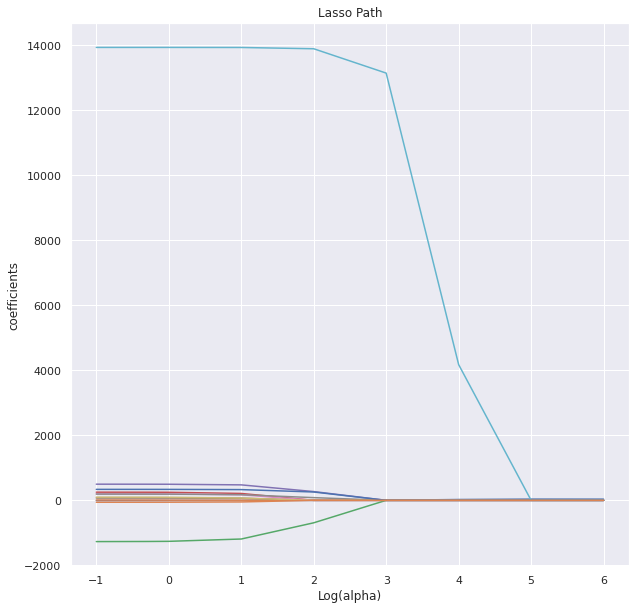

In [57]:
from itertools import cycle
from sklearn.linear_model import lasso_path

x_standardised = predictors_data_2015/predictors_data_2015.std(axis=0)


# alphas_lasso, coefs_lasso, _ = lasso_path(predictors_bike_rental, response_bike_rental, alphas = [.1, .5, 1, 10, 100], fit_intercept=False)
alphas_lasso, coefs_lasso, _ = lasso_path(x_standardised, response_data_2015.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000,100000,1000000], fit_intercept=False)
#print(alphas_lasso.shape)
#print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

<font size=4>Although the Lasso score is relatively high, the Lasso path demonstrates that there is a variable that has a quite high correlation to the response variable. So, we need to find and delete it. Then, we can rebuild the model to identify the differences between them.
</font>

<font size=4>
    </font>

<font size=4>After some tests by changing the predictor factors, we find that the high correlated variable is "communityAverage". So we delete it in the predictor factors and rebuild the Lasso model and Lasso path. </font>

In [58]:
feature_cols_new = ['Lng', 'Lat',  'square', 'livingRoom','drawingRoom','kitchen','bathRoom',
                'buildingType','buildingStructure','subway','district']
predictors_data_new = data[feature_cols_new]
response_data_new = data[['price']]

In [59]:
lasso_model = linear_model.Lasso(max_iter=10e7, normalize=True)
lasso_model.fit(X=predictors_data_new, y=response_data_new)

Lasso(max_iter=100000000.0, normalize=True)

In [60]:
lasso_model.score(X=predictors_data_new, y=response_data_new)

0.1070353062945395

<font size=4>The Lasso score drop to 0.06. This suggests that the variable "communityAverage" has a great influence on the response variable in the Lasso model.</font>

In [61]:
df_coef_lasso = pd.DataFrame({"var": predictors_data_new.columns.values, "coef":lasso_model.coef_})
print(df_coef_lasso)

                  var          coef
0                 Lng -26599.072481
1                 Lat  -2385.915333
2              square    -71.628521
3          livingRoom      0.000000
4         drawingRoom   -300.852892
5             kitchen   5957.454231
6            bathRoom      0.000000
7        buildingType     -0.000000
8   buildingStructure    393.505391
9              subway   8645.518780
10           district    546.364570


/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57065745707108.164, tolerance: 71300183216.7989
  tol, rng, random, positive)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63415713324980.14, tolerance: 71300183216.7989
  tol, rng, random, positive)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63969621213353.984, tolerance: 71300183216.7989
  tol, rng, random, positive)
/opt/conda/envs/sds2020/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: O

(-1.3, 5.3, -6837.7730703507605, 5126.295090865637)

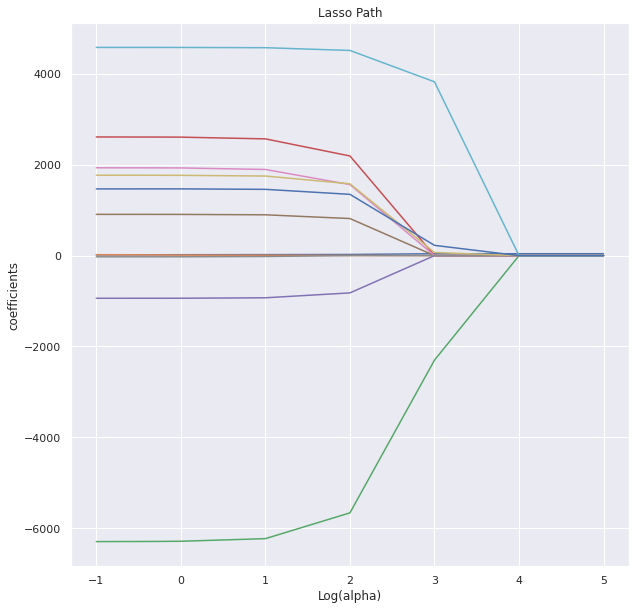

In [62]:
from itertools import cycle
from sklearn.linear_model import lasso_path

x_standardised = predictors_data_new/predictors_data_new.std(axis=0)

alphas_lasso, coefs_lasso, _ = lasso_path(x_standardised, response_data_new.values.reshape(-1),alphas = [.1, .5, 1, 10, 100, 1000, 10000,100000], fit_intercept=False)
#print(alphas_lasso.shape)
#print(coefs_lasso.shape)

log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')

<font size=4>After we delete the variable "communityAverage" in the predictor factors, the correlation of other predictor factors is relatively average in the Lasso path. This implies that the correlation of variable "communityAverage" to the response variable is quite high, which can not be explored in the multiple linear regression model. </font>
<font size=4>
    </font>

<font size=4>
</font>

---
## Discussion

<font size=4>
    </font>

### Multiple linear regression analysis

<font size=4>
</font>

<font size=4>Firstly, we check the linear regression results of house prices in Beijing in 2015. The adjusted R square is 0.863, which suggests that the model can explain 86.3% of the variability of the house prices. All the p-value of predictor variables except “building type” are less than 0.05. It demonstrates that almost all the predictor factors are significant.</font> 
        
<font size=4>In the linear regression results of house prices in Beijing in 2016, the adjusted R square score is 0.797 where is less than that in 2015. The p-value of the predictor variable “longitude” is 0.026, which is not significant. However, this may be a little contrary to our general concept of house prices. Because the location is a quite critical factor that determining the house prices. This may suggest a potential problem of using the longitude and latitude as predictor variables. The value of the longitude and latitude may not represent the location variable perfectly, We might be able to process the longitude and latitude to another type of value, for instance, the distance from the house to the city center of Beijing, before using them. </font>

<font size=4>As for the linear regression results of house prices in Beijing in 2017, the adjusted R square score is 0.881. Similar to the results in 2015, almost all the p-value of the predictor variables are significant. </font>

<font size=4>Finally, the linear regression results of house prices in Beijing from 2015 to 2017 are quite different from the results above. The adjusted R square score is only 0.474, which is relatively low. The model can only explain 47.4% of the variability. Although all the predictor variables’ p-values are less than 0.05, the model does not fit well.</font>
</font>

<font size=4>
    </font>

### Lasso model analysis

<font size=4>We build the Lasso model two times. In the first Lasso model, the Lasso score is 0.86 which is at a high level. However, when we remove the predictor variable “communityAverage”, the Lasso score drops to only 0.107. This demonstrates that the “communityAverage”, which represents the average house price of its community, has a greater influence on the house price than the other predictor variables in the Lasso model. The figures of the Lasso path also show the same results. This cannot be found in the OLS linear regression results. </font>
<font size=4>
 </font>

### Limitations

<font size=4>We only utilize the internal factors related to the house itself to build the linear regression model. However, house prices are related to many other external factors. In research (Ernawati Mustafa Kamal, Hasnanywati Hassan, 2016) points out the macroeconomics factor, demographic factors, and industry factors can affect the housing price. Also, the research (Yu, 2010) says that the housing prices in China are affected by the land policy to some degree.</font>

---
## Conclusion

<font size=4>
    </font>

<font size=4>We applying the house price data in Beijing from 2015 to 2017 to build the linear regression model. In each year’s linear regression model, it fits quite well and almost all the predictor variables are significant. This represents that we can use the house's attributes (location, square, the number of different types of rooms, etc.,) and other related factors (the surrounding public transportation, etc.,) to predict and estimate its price each year.</font> 

<font size=4>In the Lasso model, it demonstrates that the average house price of its community plays a more important role than other predictor factors in the model.</font>

<font size=4>If we use the house prices data from 2015 to 2017 to build the linear regression model, the effect of the model is not satisfactory. This suggests that the house price fluctuations in Beijing vary greatly from year to year. A reasonable explanation is due to the different land policies every year in China.</font>

<font size=4>
    </font>
    



      


---                      
#### Word count: 2193

---
## Reference


<font size=4>
    </font>

<font size=4>Aminah Md Yusof and Syuhaida Ismail (2012) Multiple Regressions in Analysing House Price Variation. doi: 10.5171/2012.383101.</font>


<font size=4>Ernawati Mustafa Kamal, Hasnanywati Hassan, A. O. (2016) Factors Influencing the Housing Price: Developers’ Perspective. Available at: https://publications.waset.org/10004541/factors-influencing-the-housing-price-developers-perspective (Accessed: 24 April 2021).</font>


<font size=4>Madhuri, C. H. R., Anuradha, G. and Pujitha, M. V. (2019) ‘House Price Prediction Using Regression Techniques: A Comparative Study’, in 6th IEEE International Conference on &amp;amp;amp;amp;amp;quot;Smart Structures and Systems&amp;amp;amp;amp;amp;quot;, ICSSS 2019. Institute of Electrical and Electronics Engineers Inc. doi: 10.1109/ICSSS.2019.8882834.</font>


<font size=4>MARIA DE GUZMAN (2019) China’s house price boom over in the 1st tier cities. Available at: https://www.globalpropertyguide.com/Asia/China (Accessed: 16 April 2021).</font>


<font size=4>Rahadi, R. A. et al. (2015) ‘Factors influencing the price of housing in indonesia’, International Journal of Housing Markets and Analysis, 8(2), pp. 169–188. doi: 10.1108/IJHMA-04-2014-0008.</font>


<font size=4>Research Online, G., Amri, S. and Tularam, G. A. (2012) ‘Performance of Multiple linear regression and Nonlinear Neural Networks and Fuzzy Logic Techniques in Modelling House Prices Journal Title Journal of Mathematics and Statistics Copyright Statement Link to published version PERFORMANCE OF MULITPLELINEARREGRESSION AND NONLINEAR NEURAL NETWORKS AND FUZZY LOGIC TECHNIQUES IN MODELLING HOUSE PRICES’, Journal of Mathematics and Statistics, 8(4), pp. 419–434. doi: 10.3844/jmssp.2012.419.434.</font>


<font size=4>Yu, H. (2010) ‘China’s house price: Affected by economic fundamentals or real estate policy?’, Frontiers of Economics in China, 5(1), pp. 25–51. doi: 10.1007/s11459-010-0002-7.</font>


<font size=4>Zhou, C. (2021) ‘House price prediction using polynomial regression with Particle Swarm Optimization’, J. Phys, p. 32034. doi: 10.1088/1742-6596/1802/3/032034. </font>
<font size=4>
    </font>

---
## Appendix

<font size=4>
    </font>

<font size=4>Link to the original raw data can be found [here](https://www.kaggle.com/ruiqurm/lianjia).</font>

<font size=4>Link to the code in Github [here](https://github.com/VON-N1NE/DSSS).</font>